# DEEP LEARNING EXAM PAPER - II

submitted by: Pushkar Khedkar

**SALES FORECASTING**

A company named ‘XYZ’ sells a variety of health products for people of all ages. Company management has decided to make key decisions on their logistics, supply and production for which they want to check the sales figures for a certain set of years which will help them to invest their bucks and time in taking decisions on key factors.
Goal: As a Deep Learning Engineer in the company, you are given historical data with respect to multiple regions of India and years (2005 to 2016). Your goal is to forecast sales for the years 2017 and 2018.
Constraints: You should use only LSTM to forecast sales (Should not use any other ML or DL
models to generate results).
Data Description: Historical sales data of XYZ company from 2005 to 2016. Attribute
Information:
1. HQ - This attribute represents HeadQuarters of the company.
2. Country - This attribute represents the country of the outlet.
3. State_of_outlet - This attribute represents the state of the outlet.
4. City_of_outlet - This attribute represents the city of the outlet.
5. Month - This attribute represents month(ranging from 1 to 12 )
6. Day - This attribute represents day of the month(ranging from 1 to 31)
7. Year - This attribute represents year(ranging from 2005 to 2016)
8. Total_Sales - Target variable (total sales on particular day). This is basically the sale index value. For eg: if value is 60 then you can assume total sale happened is 60*10,000 USD.

*Provided Files*:

**Train Data:** 
This contains a csv file consisting of data from years 2005 to 2016. Use this data for training the model and forecast sales for the years 2017 and 2018.

**Evaluation Criteria:**
The evaluation metric for this problem statement is the Mean Absolute Error

In [1]:
#importing essential liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
#loading the data
df = pd.read_excel('Sales Forecasting_Train Data.xlsx')

In [3]:
df.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1,1,2005,72.2
1,Asia,India,NaN,Bombay (Mumbai),1,2,2005,72.7
2,Asia,India,NaN,Bombay (Mumbai),1,3,2005,74.3
3,Asia,India,NaN,Bombay (Mumbai),1,4,2005,78.9
4,Asia,India,NaN,Bombay (Mumbai),1,5,2005,81.5


In [4]:
print("Dataset contains {} datapoints and {} features.".format(df.shape[0],df.shape[1]))

Dataset contains 17536 datapoints and 8 features.


In [5]:
df1 = df.copy()   #keeping the copy of original dataframe before proceeding further

In [6]:
df.isnull().sum()

HQ                     0
Country                0
State_of_outlet    17536
City_of_outlet         0
Month                  0
Day                    0
Year                   0
Total_Sales            0
dtype: int64

In [7]:
#dropping state of outlet since it has all the null values. dropping other irrelevent features as well.
df.drop(columns= ["State_of_outlet","City_of_outlet","Country","HQ"],inplace = True)

In [8]:
#creating a datetime column
df['Date'] = df["Day"].astype(str) +"-"+ df["Month"].astype(str)+"-"+ df["Year"].astype(str)
df["Date"] = df["Date"].apply(lambda x: parser.parse(x))

In [9]:
df.drop(columns=["Day","Month","Year"], inplace=True)

In [10]:
df.head()

,Total_Sales,Date
0,72.2,2005-01-01
1,72.7,2005-02-01
2,74.3,2005-03-01
3,78.9,2005-04-01
4,81.5,2005-05-01


In [11]:
monthly_sales = df.groupby(pd.Grouper(key='Date',freq='M')).sum() #sales per month

In [12]:
monthly_sales.head()

,Total_Sales
Date,
2005-01-31,9062.2
2005-02-28,8638.0
2005-03-31,9988.6
2005-04-30,9925.9
2005-05-31,10591.7


In [13]:
monthly_sales.shape

(144, 1)

### Train-test split

We take 80% data for training and 20% data for testing. but we have to do this in orderly fashion. we take last 20% rows for testing and use first 80% for training purpose.

In [14]:
train_df, test_df = train_test_split(monthly_sales, shuffle=False, test_size= 0.2, random_state=13)

In [15]:
print("No. of months of in training data: ", train_df.shape[0])
print("No. of months of in testing data: ", test_df.shape[0])

No. of months of in training data:  115
No. of months of in testing data:  29


In [16]:
train_df.tail()

,Total_Sales
Date,
2014-03-31,10044.2
2014-04-30,10113.1
2014-05-31,10624.6
2014-06-30,9617.6
2014-07-31,10426.1


In [17]:
test_df.tail()

,Total_Sales
Date,
2016-08-31,10461.8
2016-09-30,9871.1
2016-10-31,9521.9
2016-11-30,8769.0
2016-12-31,9430.3


### Scaling the data:

In [18]:
MMS = MinMaxScaler()
train = MMS.fit_transform(train_df)
test = MMS.transform(test_df)

# LSTM MODEL

In [19]:
TSG = TimeseriesGenerator(train , train , length= 100, batch_size=1)    #Time series Generator

In [20]:
# defining model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
val_gen= TimeseriesGenerator(test ,test , length= 20 ,batch_size=1)
early_stop = EarlyStopping(monitor = 'val_loss', patience= 2)

In [22]:
model.fit(TSG , epochs=100 , validation_data=val_gen)  #fitting the model

Epoch 1/100
15/15 [==============================] - 4s 100ms/step - loss: 0.1200 - val_loss: 0.0787
Epoch 2/100
15/15 [==============================] - 1s 52ms/step - loss: 0.1306 - val_loss: 0.1224
Epoch 3/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0799 - val_loss: 0.0638
Epoch 4/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0709 - val_loss: 0.0856
Epoch 5/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0742 - val_loss: 0.0635
Epoch 6/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0767 - val_loss: 0.0842
Epoch 7/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0753 - val_loss: 0.0649
Epoch 8/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0686 - val_loss: 0.0747
Epoch 9/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0735 - val_loss: 0.0717
Epoch 10/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0696 - val_loss: 0.063

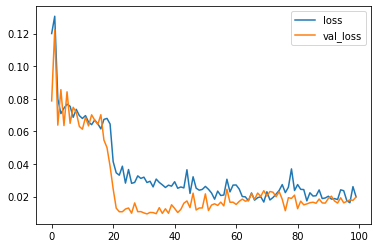

In [23]:
(pd.DataFrame(model.history.history)).plot()  #plotting loss

# Evaulation (TEST)

In [24]:
pred_test = []
eval_c_1 = train[-100:]
eval_c = eval_c_1.reshape((1, 100, 1))
for i in range(len(test)):
    pred_c = model.predict(eval_c)[0]
    pred_test.append(pred_c) 
    eval_c = np.append(eval_c[:,1:,:],[[pred_c]], axis=1)

In [25]:
final_pred = MMS.inverse_transform(pred_test)

In [26]:
test_df['predicted sales'] = final_pred

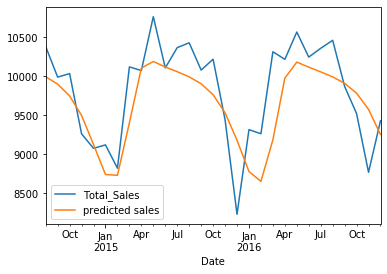

In [27]:
test_df.plot()

# MEAN SQUARED ERROR

In [28]:
mean_squared_error(test_df['Total_Sales'] , test_df['predicted sales'])

205393.69277684728

In [29]:
#RMSE
np.sqrt(mean_squared_error(test_df['Total_Sales'] , test_df['predicted sales']))

453.2038093141399

# FORECASTING

In [30]:
final_train = MMS.fit_transform(monthly_sales)
TSG = TimeseriesGenerator(final_train,final_train,length=24,batch_size=1)
model = Sequential()
model.add(LSTM(100, activation = 'relu' , input_shape= (24,1)))
model.add(Dense(1))
model.compile(optimizer = 'adam' , loss='mse')
model.fit(TSG ,epochs= 50)

Epoch 1/50
120/120 [==============================] - 1s 4ms/step - loss: 0.0783
Epoch 2/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0635
Epoch 3/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 4/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 5/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0448
Epoch 6/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0405
Epoch 7/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0285
Epoch 8/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0289
Epoch 9/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0252
Epoch 10/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0204
Epoch 11/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 12/50
120/120 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 13/50
120/120 [====

In [31]:
forecast_list = []
period = 24  #24 months
eval_c_1 = train[-24:]
eval_c = eval_c_1.reshape((1, 24, 1))
for i in range(period):
    pred_c = model.predict(eval_c)[0]
    forecast_list.append(pred_c) 
    eval_c = np.append(eval_c[:,1:,:],[[pred_c]], axis=1)
forecast_list = MMS.inverse_transform(forecast_list)
fc_index = pd.date_range(start='2017-01-31',periods=period,freq='M')
forecasted_sales = pd.DataFrame(data=forecast_list,index=fc_index,columns=['Forecast'])

# COMBINED PLOT OF MONTHLY SALES AND FORECASTED SALES

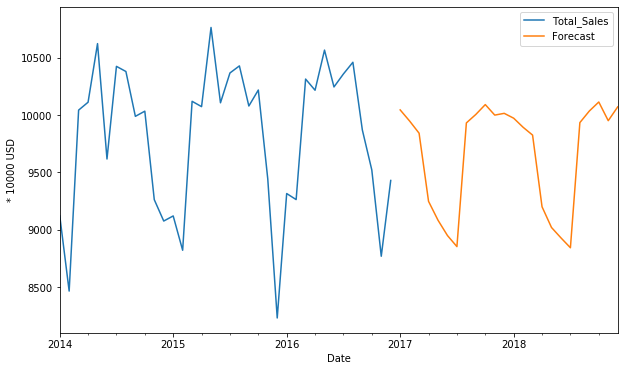

In [34]:
ax= monthly_sales.plot(figsize=(10,6))
forecasted_sales.plot(ax=ax)
plt.xlim('2014-01-31','2018-12-31')
plt.ylabel("* 10000 USD")     #multiply y axis values by 10000 to get sales in USD
plt.show()